<a href="https://colab.research.google.com/github/zeevachaver/Spotify_Data_Analysis/blob/main/spotify2023data_analysis_aisc_group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify 2023 Data Analysis

# Introduction:

Have you ever been scrolling on spotify and wondering what the most popular songs are? Or maybe you are wondering, what makes a song popular? Well in this project we aim to use data analysis and statistics to find that out. We will be using a data set that contains the top songs in spotify from 2023.

In [ ]:
# Import all important libraries!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Lets take a look at the data set
spotify = pd.read_csv("spotify_2023.csv", encoding = 'unicode_escape', engine ='python')
#Lets look at the first couple of rows just to check if it loaded in correctly
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


Let's quickly check the dimensions of our data set.

In [ ]:
#Attribute for the dimensions of the dataset
spotify.shape

(953, 24)

Perfect! Our dataset has 953 rows and 24 columns. Now lets check what each column holds and what data type they hold.

In [ ]:
#Gives us information about the columns
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

We can now see all the columns and how many values they have. We can also see what data type is in their column (e.g. integer or object). As is in standard data practice, we want to drop all the NA values, as they will not be of use to us. However, let's first see which columns have NA values and whether or not columns are useful, to determine if the row might still be useful.

In [ ]:
spotify.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

As these columns may be something we might analyze later, for now let's not clear any NAs. Now, let's check the trend of all the columns by using the describe() function.

In [ ]:
#Track 574 has improper data, lets change it and convert streams to int
spotify.loc[spotify['track_name'] == 'Love Grows (Where My Rosemary Goes)', 'streams'] = 209536449
spotify['streams'] = spotify['streams'].astype(int)
spotify.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,5.138178e+08,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,5.666451e+08,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.417210e+08,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.902286e+08,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.738011e+08,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Let's analyze some of these summary statistics!

Date:
In this dataset there are songs released from 1930 to 2023, with a mean song release year of 2018.

Streams:
The mean number of streams is 513,817, with a standard deviation of 566,645. This means that our data has a lot of variation and we need to keep this in account when doing our data analysis!

In [ ]:
#description of categorical variables
spotify['track_name'].describe()

count          953
unique         943
top       Daylight
freq             2
Name: track_name, dtype: object

In [ ]:
spotify['artist(s)_name'].describe()

count              953
unique             645
top       Taylor Swift
freq                34
Name: artist(s)_name, dtype: object

We see that we have 943 unique tracks, as we may have the same tracknames appearing in this dataset by different artists (e.g. the track "Daylight" appears twice in the dataset). For artists, there are 645 unique artists and Taylor Swift is the top artist, appearing 34 times in the dataset.

# Data Analysis
## Question 1: What were the most streamed songs of 2023?

We are curious, what were the most streamed songs of 2023? Let's use our pandas library to figure that out from this data set.

In [ ]:
#There might be many artists with multiple songs in the dataset. Let's figure out how many artists are in this dataset.
spotify['artist(s)_name'].unique().size

645

In [ ]:
spotify_top10 = spotify.sort_values(by = "streams", ascending = False).iloc[:10,:]
spotify_top10

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,170,C#,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,186,G,Major,68,49,59,16,0,13,28


We can now see that the most popular song on Spotify at this moment was Blinding Lights by The Weeknd. Some of the most popular artists are The Weeknd, Ed Sheeran, and Drake. The bar graph below creates a visualization of the streams for the top ten streamed songs on Spotify that we have just found.

Text(0, 0.5, 'Track names')

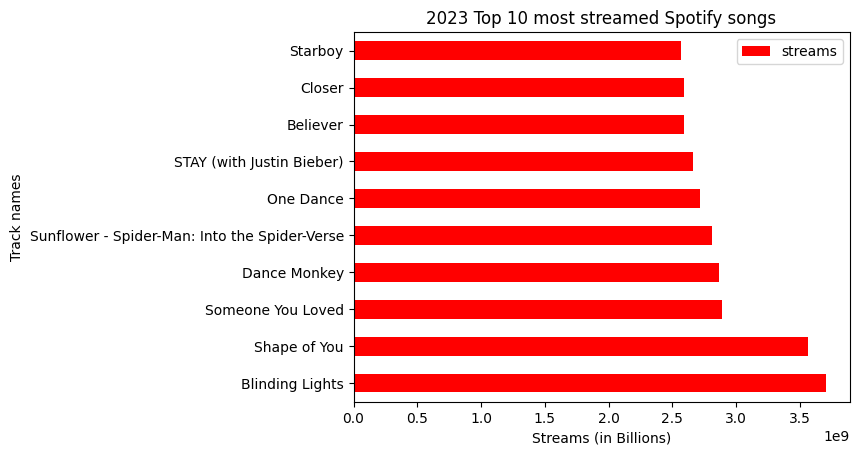

In [ ]:
spotify_top10.plot.barh("track_name", "streams", color = "red")
plt.title("2023 Top 10 most streamed Spotify songs")
plt.xlabel("Streams (in Billions)")
plt.ylabel("Track names")

## Question 2: Who was the most popular artist of 2023?

In our analysis, we want to see who was the most popular artist of 2023. Lets do that below

In [ ]:
top_artists = spotify.groupby("artist(s)_name")["streams"].sum()
top_artists = top_artists.sort_values(ascending = False).nlargest(10)
top_artists

artist(s)_name
The Weeknd         14185552870
Taylor Swift       14053658300
Ed Sheeran         13908947204
Harry Styles       11608645649
Bad Bunny           9997799607
Olivia Rodrigo      7442148916
Eminem              6183805596
Bruno Mars          5846920599
Arctic Monkeys      5569806731
Imagine Dragons     5272484650
Name: streams, dtype: int64

Now we have found the top ten artists by streams. We did this by grouping by the artists and summing the number of streams. Then, since we want to see the highest number of streamed artists, we sort values by descending. Lets graphically represent this

Text(0, 0.5, 'Streams (in 10s of billions)')

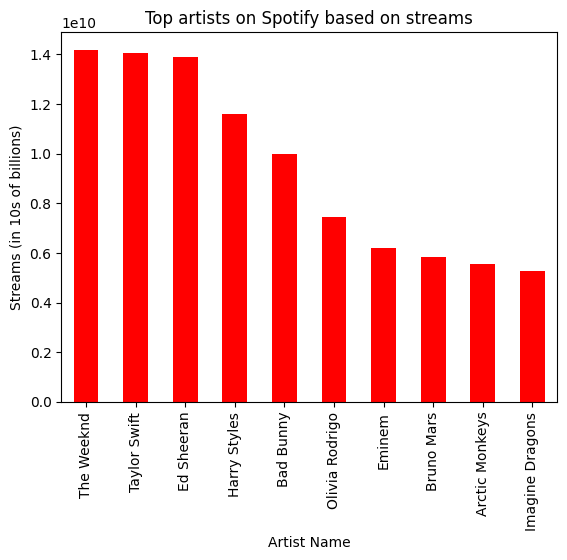

In [ ]:
top_artists.plot.bar("artist(s)_name", "streams", color = "red")
plt.title("Top artists on Spotify based on streams")
plt.xlabel("Artist Name")
plt.ylabel("Streams (in 10s of billions)")

## Analysis 1: Distributions and Linear Regression

Let's investigate the distribution of all our variables, as we want to know if there are any underlying issues with the data before we do regression and testing. Let's do a quick diagnostic on each of the variables, using pandas and seaborn.

In [ ]:
spotify_num = spotify.select_dtypes(include = ['float64', 'int64']).copy() #pick only integer and float values of the dataset
spotify_num.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,141381703,43,263,10,125,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,133716286,48,126,14,92,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,140003974,94,207,14,138,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,800840817,116,207,12,170,55,58,72,11,0,11,15
4,1,2023,5,18,3133,50,303236322,84,133,15,144,65,23,80,14,63,11,6


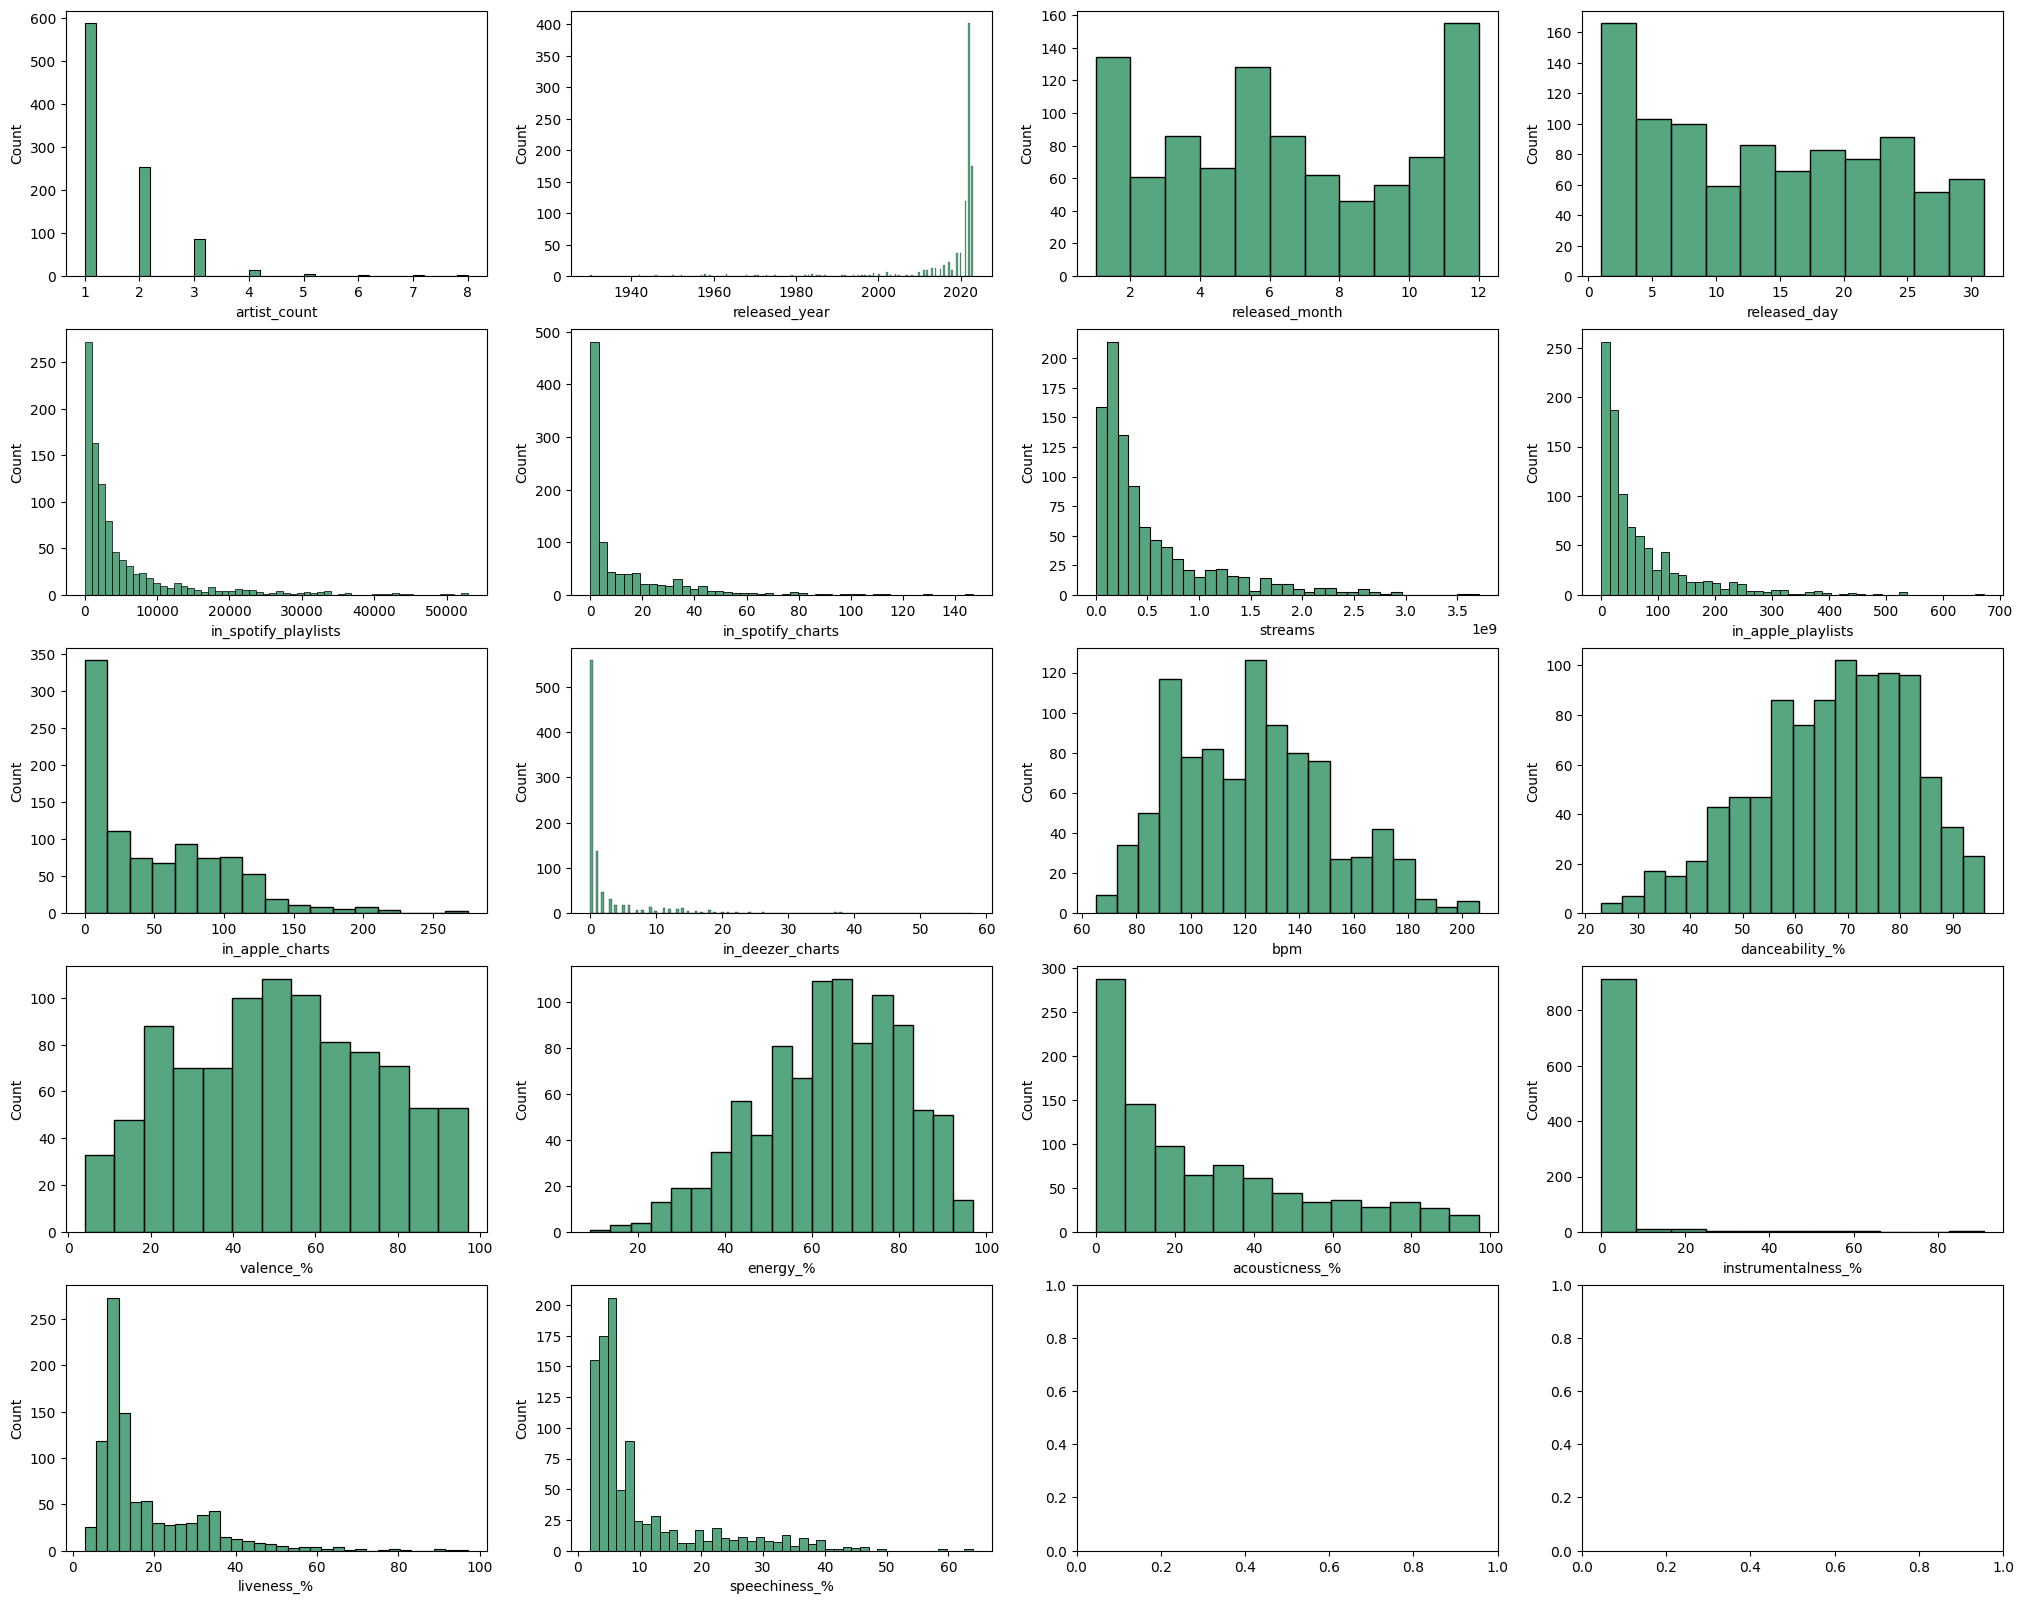

In [ ]:
f,ax = plt.subplots(5,4,figsize = (25,20))
for i, col in enumerate(spotify_num.columns):
    sns.histplot(data=spotify_num, x=col, kde=False, color='#1d8954', ax=ax[i//4,i%4])
plt.show()

This code plots the distribution of all the variables. We see here that our Year distribution is heavily skewed left (more values on the right side of the plot), showing that our dataset has very few old songs. In addition we see a similar skew with our dancebility and energy metrics, which suggests that there are fewer older, less danceable, and less energetic songs in our dataset.

Let's now analyze some of the relationships between our variables and the number of streams they get. To do this, let's do a linear regression.

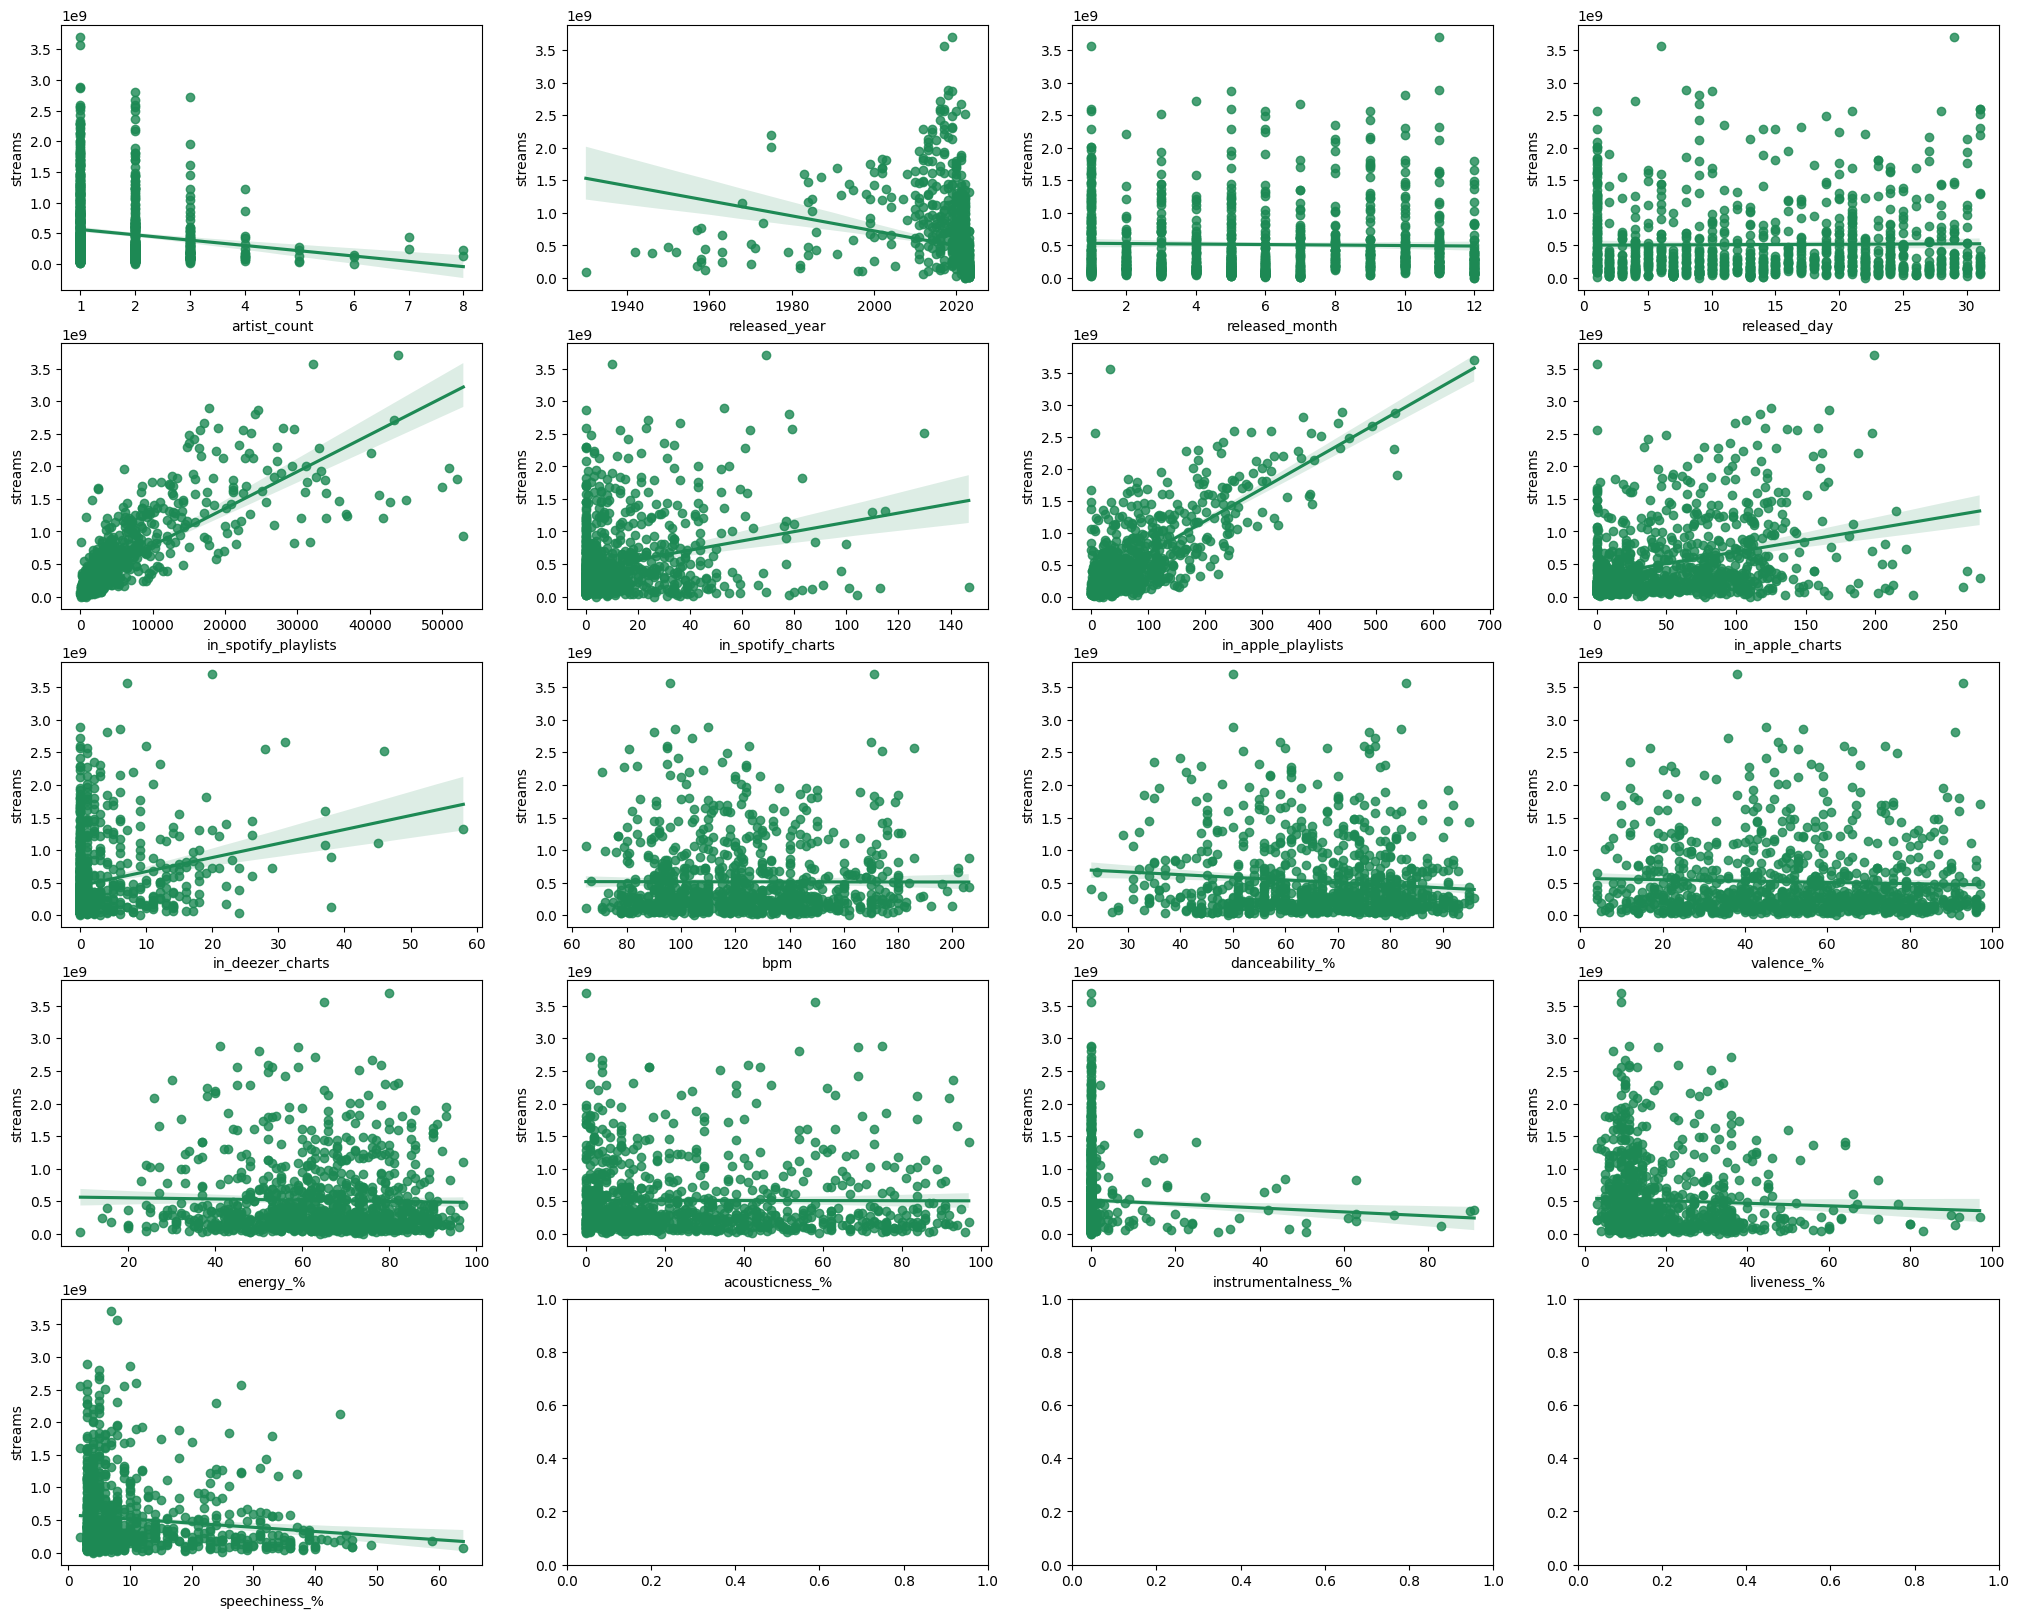

In [ ]:
f,ax = plt.subplots(5,4,figsize = (25,20))
num_cols = spotify_num.loc[:,spotify_num.columns != 'streams'].columns
for i, col in enumerate(num_cols):
    sns.regplot(data=spotify_num, x=col, y='streams', color='#1d8954', ax=ax[i//4,i%4])
plt.show()

Using this code, we can look at all the variables, with respect to streams, and see their relationship. Obviously, we expected that if they were in more spotify playlists and charts, then they would have more streams. However, the regressions show a clearly strong relationship between songs that are in apple playlists/charts, deezer charts and streams. Therefore, we may hypothesize that songs that appear in a more varied amount of streaming platforms get more spotify streams.

Let's specifically analyze these correlations now.

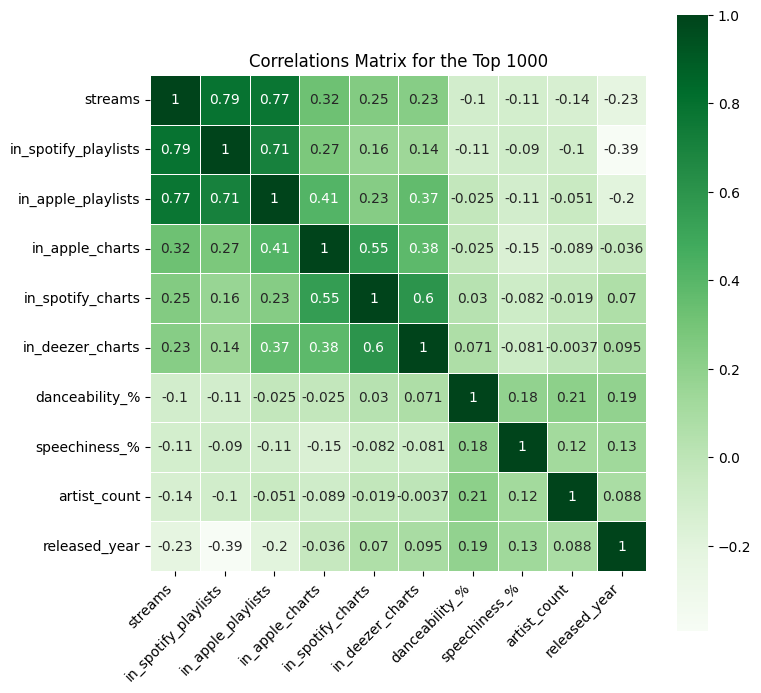

In [ ]:
#Calculated correlations and sort them by streams
spotify_corr = spotify_num.corr(method = "pearson")
spotify_sorted = spotify_corr['streams'].sort_values(ascending = False)

#Let's only check correlations that are significant
CorHigh = spotify_sorted[abs(spotify_sorted) > 0.1].index
spotify_corr = spotify_corr.loc[CorHigh, CorHigh]

# plot the correlation matrix
plt.figure(figsize=(8,8))
corrplot = sns.heatmap(spotify_corr, annot=True, cmap='Greens', square=True, linewidths=0.5, linecolor='white')
corrplot.set_xticklabels(corrplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlations Matrix for the Top 1000')

plt.show()

This correlation heatmap confirms our initial thoughts about the correlation between songs in other playlists and the streams that they get on Spotify.

## Analysis 2: Should artists collab with each other to do better on the spotify charts?

Although many hit singles are present on Spotify's top charts, we want to know if it is more beneficial for artists to collab with one another to produce a top song. Let's try to come up with an answer from the data that we have.

In [ ]:
#We need to add a column that tells us if the song was done solo or not
spotify['collab']= list(['Multiple Artists' if x>1 else 'Solo' for x in spotify['artist_count']])
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,collab
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Multiple Artists
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,Solo
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,Solo
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,Solo
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,Solo


Let's compare the two median stream values by using a boxplot.

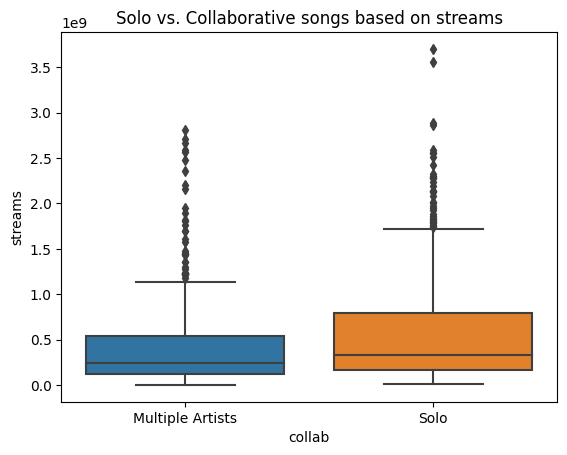

In [ ]:
sns.boxplot(data = spotify, x = 'collab', y = 'streams')
plt.title("Solo vs. Collaborative songs based on streams")
plt.show()

From the boxplot, we can see that the median of the solo streams is higher than the multiple artists. This means we may conclude that this data supports the hypothesis that solo albums tend to do better on average than albums with multiple artists.

Let's quantify these results. We want to now know, specifically in this dataset, which songs did the best solowise as well as with multiple artists. We can do this by creating side-by-side horizontal boxplots.

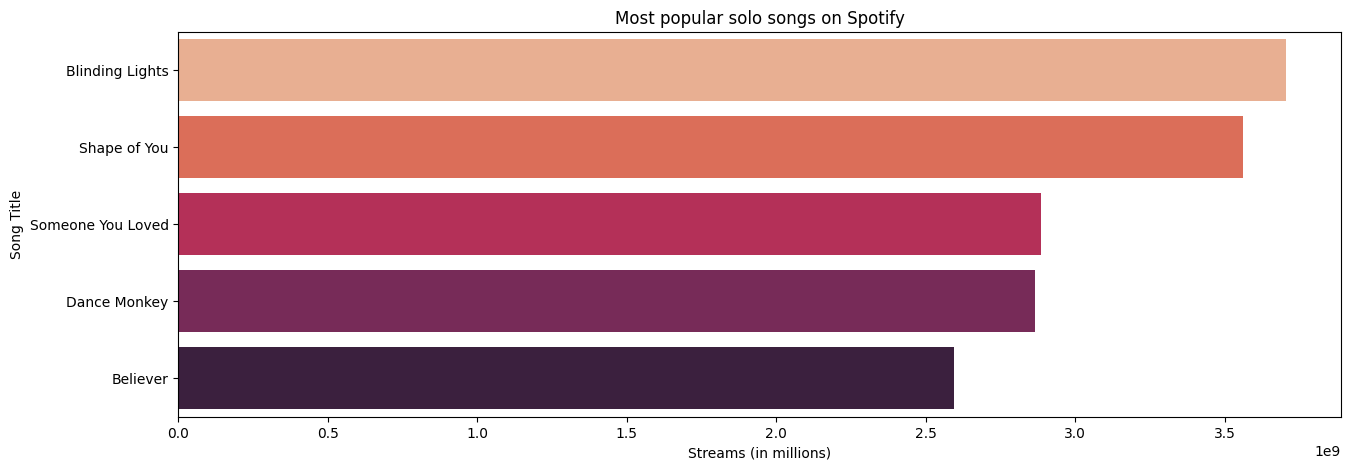

In [ ]:
#Bar plot for solo songs
x=spotify.sort_values(['collab','streams'],ascending=[True,False])
plt.figure(figsize = (15,5))
sns.barplot(data = x[x.collab == 'Solo'].head(), x = 'streams', y = 'track_name', palette = "rocket_r" )
plt.title('Most popular solo songs on Spotify')
plt.xlabel("Streams (in millions)")
plt.ylabel("Song Title")
plt.show()

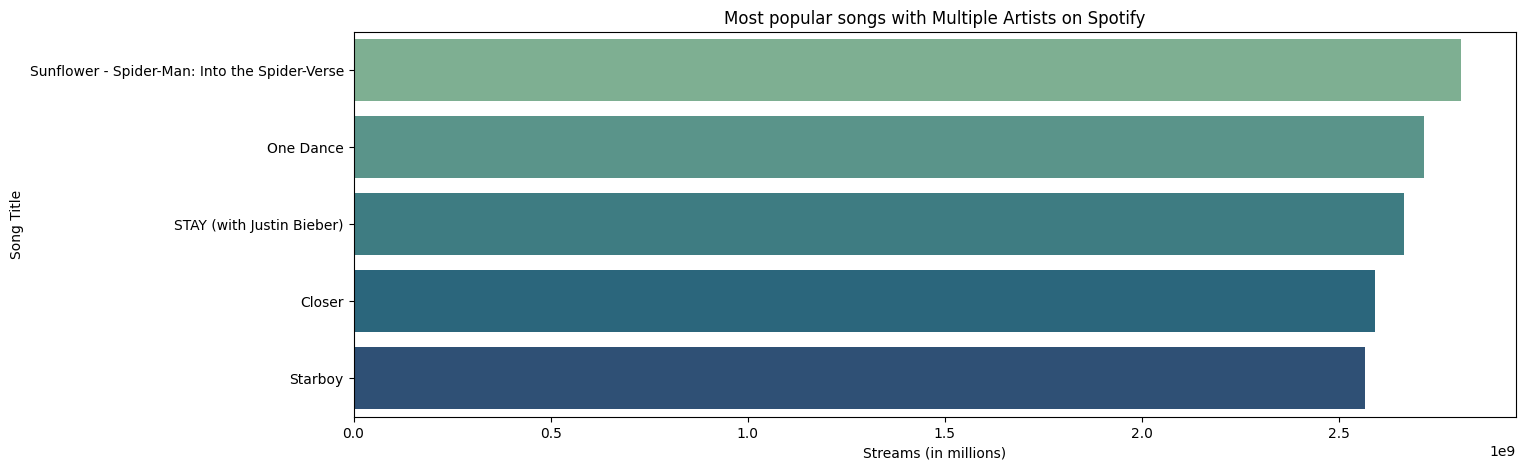

In [ ]:
#Bar plot for multiple artists songs
plt.figure(figsize = (15,5))
sns.barplot(data = x[x.collab != 'Solo'].head(), x = 'streams', y = 'track_name', palette = "crest" )
plt.title('Most popular songs with Multiple Artists on Spotify')
plt.xlabel("Streams (in millions)")
plt.ylabel("Song Title")
plt.show()

By looking at these bar charts we can see that the most popular solo song on Spotify at this point is Blinding Lights by the Weeknd with about 3.5 million streams. In the multiple artists category, the most popular song is Sunflower with around 2.75 million streams. This proves the findings from the boxplots that on average, the songs that are done solo do better than those with collabs.

## Analysis 3: Key and Mode vs. Streams

Musically speaking, every song has a key and a mode. There are 12 keys (C, C#, D, Eb, E, F, F#, G, Ab, A, Bb, and B) and each key can be either major or minor. Major keys often sound brighter and happier whereas minor keys sound darker and sadder. We are interested in knowing the relationship between key and mode vs. streams. This way we can advise artists the most optimal key and mode for their songs to be in the top Spotify charts. Our analysis is as follows:

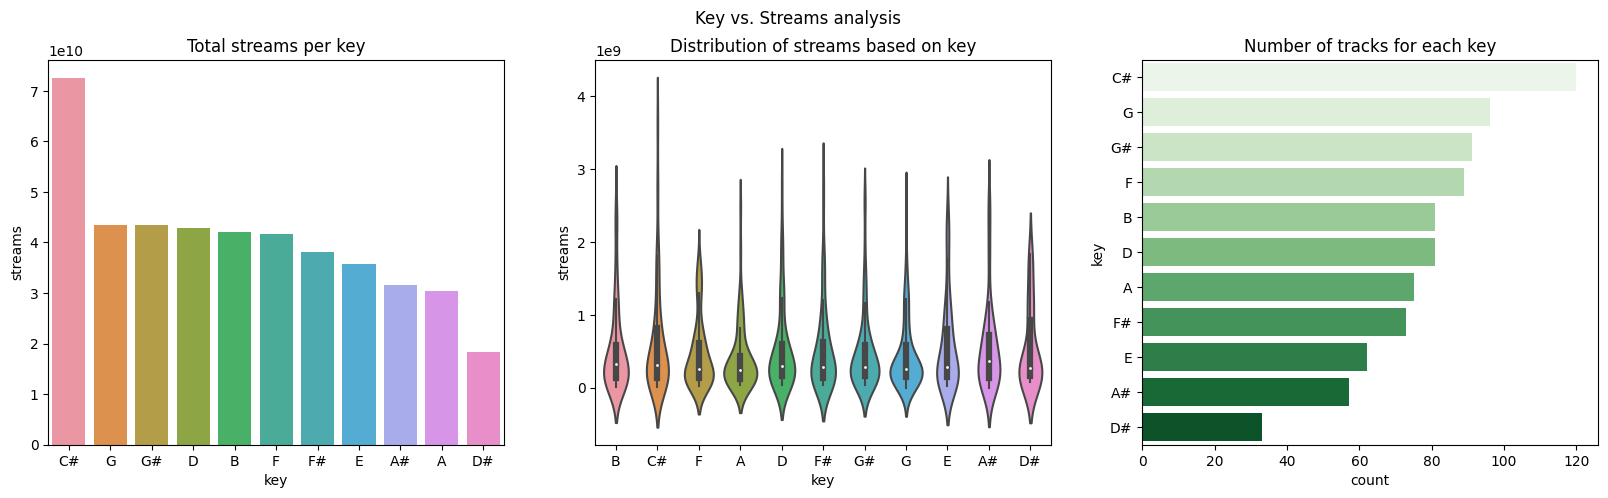

In [ ]:
#Let's analyze the key:

#Make 3 subplots
fig,ax = plt.subplots(1,3,figsize = (20,5))

#Making the new dataframe
x = spotify.groupby('key')['streams'].sum().reset_index().sort_values(by = 'streams', ascending = False)

#First subplot will be a barplot
sns.barplot(data = x, x = 'key', y = 'streams', ax = ax[0])
ax[0].title.set_text('Total streams per key')

#Second subplot will be a boxplot
sns.violinplot(data = spotify, x = 'key', y = 'streams', ax = ax[1])
ax[1].title.set_text('Distribution of streams based on key')

#OPTIONAL: 3rd plot will be a countplot (in form of horizontal barplot)
sns.countplot(data=spotify,y='key',order=spotify['key'].value_counts().index, palette='Greens',ax=ax[2])
ax[2].title.set_text('Number of tracks for each key')

plt.suptitle("Key vs. Streams analysis")
plt.show()


Analysis: It seems like the key that gets the most streams is C# according to the first plot. However, we can see that distribution is of the C# key is heavily skewed right with a large tail extending from the right. In addition to that, the rightmost plot confirms the idea that the most popular key and the one that seems to be that of choice for top songs on Spotify is C#. Let's now do the same analysis for the mode.

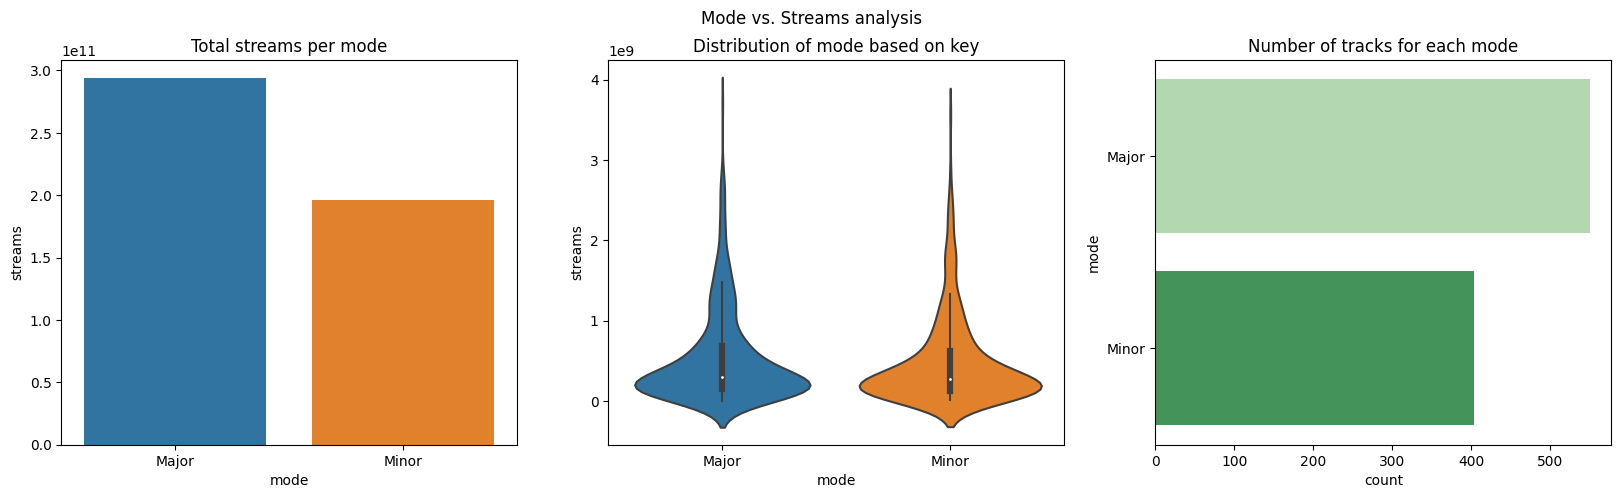

In [ ]:
#Mode analysis

#Make 3 subplots
fig,ax = plt.subplots(1,3,figsize = (20,5))

#Making the new dataframe
x = spotify.groupby('mode')['streams'].sum().reset_index().sort_values(by = 'streams', ascending = False)

#First subplot will be a barplot
sns.barplot(data = x, x = 'mode', y = 'streams', ax = ax[0])
ax[0].title.set_text('Total streams per mode')

#Second subplot will be a boxplot
sns.violinplot(data = spotify, x = 'mode', y = 'streams', ax = ax[1])
ax[1].title.set_text('Distribution of mode based on key')

#Third plot will be a countplot (in form of horizontal barplot)
sns.countplot(data=spotify,y='mode',order=spotify['mode'].value_counts().index, palette='Greens',ax=ax[2])
ax[2].title.set_text('Number of tracks for each mode')

plt.suptitle("Mode vs. Streams analysis")
plt.show()

Mode analysis: From the first graph, we can see that the major mode appears more than the minor mode in the top spotify songs. In addition to that from the violin plots, we can see the distributions of both modes seem to be roughly the same with a noticeable skew right in the data. The data in the rightmost barplot shows the similar thing to the first barplot as it shows that there are more tracks in the major key meaning that artists are catering more major mode songs as they perform better.

# Final Analysis

In this project we analyzed the Spotify_2023 dataset. This dataset contained information about songs released from 1930 to 2023, their data (artist name, track name, etc.), their total stream numbers from 2023, and some other Spotify specific variables like energy% and acousticness%.

We first needed to clean the dataset and change some of the datatypes. For example, the value for streams was a string, therefore, we couldn't use it for our visualizations so we needed to convert it to an integer. Once we converted it to an integer, we realized that one of the values was entered wrong so we needed to manually remove that row.

Once we properly formatted our data, we wanted to scope the data and answer a few basic questions. The first question we wanted to answer was, "Which song was the most popular in 2023?". To do this we manipulated the dataset to group by track name and sort by streams, and we plotted this in a bar graph. We found that Blinding Lights by the Weeknd was the most popular song of 2023.

Next we wanted to ask the question, "Who was the most popular artist on Spotify in 2023?" To answer this question, we grouped by artists and indexed the streams. Then we added the streams up to get the total sum of streams per artist and sorted those values. We represented this graphically using a bar graph and found that the most popular artist was The Weeknd, followed closely by Taylor Swift.

Now we moved into our main research question: What makes a song top the charts on Spotify? Our attempts to answer this question will be explained below.

## Analysis 1:
### Analyzing underlying Distributions

The first analysis we wanted to carry out was to see the underlying distribution of our variables. To do this we gathered all of the numeric columns, ran a loop to go through all the columns, and used the seaborn barplot function to display a histogram for all the variables. We saw that our Year distribution is heavily skewed left (more values on the right side of the plot) so we were able to conclude that the dataset has very few old songs. In addition, we saw a similar skew left with our dancebility and energy metrics. Therefore, from our distribution analysis we could say that the dataset lacked songs that were older, less energetic, and less danceable. This may imply that these types of songs aren't as popular in the top songs for 2023.

### Linear Regression

In the second part of this analysis, we wanted to implement a linear regression on all the numerical variables, as they related to streams, and determine which variables, if any, had a linear relationship to streams. To do this, we used the same columns as the distribution analysis and created the same amount of subplots. However, we used the seaborn linear regression function in the loop to get these plots. After creating the linear regression plots, we created a heatmap of the correlation matrix to quantify the correlation values. From both of these two visuals we were able to see that most of the variables had little to no correlation between streams. However, there were a couple of variables that we believed could have some relationship to streams. These variables included the frequency in spotify, apple, and deezer playlists. Since we can conclude from common sense that the more times a song appears in spotify playlists that it would be have higher streams on Spotify, that correlation wasn't useful to analyze. Instead we came to the conclusion from the correlations between streams on spotify and the frequence on apple and deezer playlists that songs that appear on more platforms end up doing better overall on Spotify.

## Analysis 2: Should artists collab with each other in hopes of doing better on Spotify?

Artists commonly is collaborate on songs with each other - however, what does our data say about the performance of these songs? Do those songs do better on average than solo releases? We wanted to answer that question based on our dataset. The first thing we needed to do was to add a column that indicated if a song was a collab or a solo release. We did this by checking if there was more than 1 artist in the artist(s) name column and making a new column with value of either 'solo' or 'multiple artists'. From there we wanted to analyze the distribution of streams vs. collab (or not). We used the seaborn boxplot to do this. We found that the median value for streams for the solo songs was higher than that for multiple artists. To quantify these findings, we wanted to see which songs were the highest streamed solo songs and the highest streamed collab songs. To do this we made two horizontal bar plots to find out the 5 most streamed solo and collab songs. From that we found that the top solo song, Blinding Lights, had over 3.5 million streams whereas the top collab song, Sunflower, only had around 2.75 million streams. This quantifies the results we found and shows that solo songs generally do better than songs where artists collab with each other.  

## Analysis 3: What key and mode should artists choose to ensure a successful song?

Musically speaking, every song has a key and a mode. There are 12 keys (C, C#, D, Eb, E, F, F#, G, Ab, A, Bb, and B) corresponding to the notes in Western music and each key can be either major or minor. Major keys often sound brighter and happier whereas minor keys sound darker and sadder. Songs with a major mode tend to be more appropriate for larger settings like parties, whereas minor mode songs may be considered more appropriate for "intimate" settings like introspective listening. We analyze data specific to this topic to look at why an artist may choose a respective key and mode for their song when considering its performance.

### Key Analysis

To analyze the key, we created three subplots. One plot has the total streams for each key, one has a distribution of the streams per key, and the last graph shows the number of songs associated with each key. In our key visualizations we found that the key of C# was the most popular, as it resulted in the most streams. In addition, it seemed that artists catered to this trend as the number of songs with the C# key was much higher than the rest of the keys.

### Mode Analysis

To analyze the mode, we created three subplots. One with the total streams for each mode, one with a distribution of the streams per mode, and the last graph showing the number of songs associated with each mode. In our mode visualizations, the major mode was the most popular as it resulted in the most streams. Both the distributions of major and minor modes seemed to be roughly the same with a slight skew right (longer tail to the right). It also seemed that artists tended to release more songs in the major mode rather than the minor mode.

When thinking about what key and mode artists should target, we have determined that they should try to release a song in C# major to increase their likelihood of getting a top song on Spotify.

## Final Thoughts

After cleaning the data from this Spotify 2023 dataset, we answered several shallow and deep questions concerning it. We believe we were better able to understand some of the overall trends we see in this data. Although this analysis accomplished a lot, more comprehensive data analysis could be done and a machine learning model could be trained based on the analysis we have done as a precursor.